# Linear regression 

In this class we are going to solve a linear regression problem by minimizing a cost function.

This procedure is known as gradient descent

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_regression

In [279]:
# randomly generate a regression sample dataset
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 

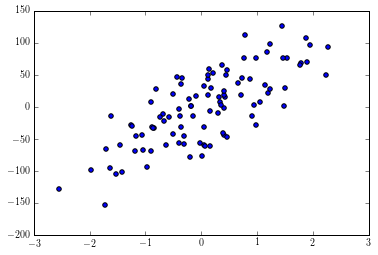

In [280]:
plt.scatter(x, y)
plt.show()

Cost function is given by:

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\theta(x_{i}) - y_{i}) ^ 2$

In [281]:
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            print 'Converged, iterations: ', iter, '!!!'
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print 'Max interactions exceeded!'
            converged = True

    return t0,t1

def gradient_descent_v(alpha, x, y, numIterations):
    # code extracted from http://www.bogotobogo.com/python/python_numpy_batch_gradient_descent_algorithm.php
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for step in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost
        if step % 100 == 0:
            print "iter %s | J: %.3f | theta0 %.3f | theta1 %.3f" % (step, J, theta[0], theta[1])      
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

In [282]:
m, n = np.shape(x)
alpha = 0.01  # learning rate
ep = 0.01 # convergence criteria

%time theta = gradient_descent(alpha, x, y, ep=ep, max_iter=1000)


# plot
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1] * x_ 

Converged, iterations:  643 !!!
CPU times: user 586 ms, sys: 31 ms, total: 617 ms
Wall time: 594 ms


In [283]:
# by gradient descent
print 'y = {} + {}x'.format(theta[0], theta[1])

y = [-2.81915562] + [ 43.13909276]x


In [285]:
x, y = np.array([1, 2, 4, 0]), np.array([.5, 1, 2, 0])
m = np.shape(x)[:1]
x_ = np.c_[ np.ones(m), x] # insert column
%time theta = gradient_descent_v(alpha, x_, y, 1000)
print theta

iter 0 | J: 2.031 | theta0 1.000 | theta1 1.000
iter 100 | J: 0.053 | theta0 0.501 | theta1 0.322
iter 200 | J: 0.025 | theta0 0.345 | theta1 0.376
iter 300 | J: 0.012 | theta0 0.238 | theta1 0.415
iter 400 | J: 0.006 | theta0 0.164 | theta1 0.441
iter 500 | J: 0.003 | theta0 0.113 | theta1 0.460
iter 600 | J: 0.001 | theta0 0.078 | theta1 0.472
iter 700 | J: 0.001 | theta0 0.053 | theta1 0.481
iter 800 | J: 0.000 | theta0 0.037 | theta1 0.487
iter 900 | J: 0.000 | theta0 0.025 | theta1 0.491
CPU times: user 10.5 ms, sys: 2.17 ms, total: 12.7 ms
Wall time: 11 ms
[ 0.01746906  0.49373271]


In [286]:
mean_squared_error(x, y, t0=-1, t1=2)

3.78125

In [288]:
# sklearn check
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)

print 'y = {} + {}x'.format(regr.intercept_, regr.coef_[0])

ValueError: Found arrays with inconsistent numbers of samples: [1 4]

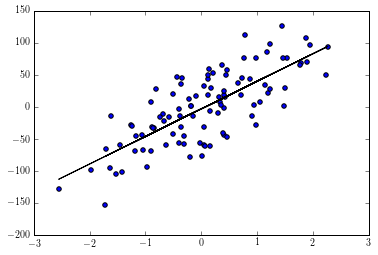

In [223]:
plt.scatter(x_[:,1], y)
plt.plot(x_,y_predict,'k-')
plt.show()

A simpler example of gradient descent

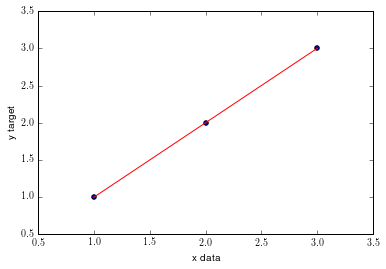

In [289]:
data = np.array([1, 2, 3])
target = np.array([1, 2, 3])

plt.scatter(data, target)
plt.plot(data, target, 'r-')
plt.xlabel('x data')
plt.ylabel('y target')
plt.show()

In [290]:
def mean_squared_error(x, y, t0=0.0, t1=0.0):
    m = len(x) # number of samples
    
    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
    return J/(2*m)

one important thing to notice is both parameters (theta0, theta1) are update simultaneously

In [291]:
regr = linear_model.LinearRegression()
regr.fit(data.reshape(3, 1), target.reshape(3, 1))
print 'coeff', regr.coef_[0]

print 'error for h(x) = 1 {}'.format(mean_squared_error(data, target, t1=1.0))
print 'error for h(x) = 0.5 {}'.format(mean_squared_error(data, target, t1=0.5))
print 'error for h(x) = 0.0 {}'.format(mean_squared_error(data, target, t1=0.0))

coeff [ 1.]
error for h(x) = 1 0.0
error for h(x) = 0.5 0.583333333333
error for h(x) = 0.0 2.33333333333


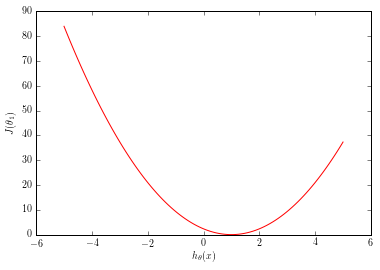

In [227]:
xx = np.linspace(-5, 5, 100)   #
error = np.array([mean_squared_error(data, target, t1=i) for i in xx])


plt.rc('text', usetex=True)
plt.plot(xx, error, 'r-')
plt.ylabel(r"$J(\theta_{1})$")
plt.xlabel(r"$h_{\theta}(x)$")
plt.show()

## Special case for linear regression

A special case for linear regression is when is not possible to represent the model by a simple linear equation. Consequently it is necessary to create a polynomial representation of the function.

Sklearn has some methods to deal with this problem

In [228]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

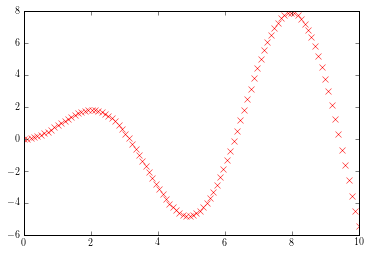

In [239]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

# generate points used to plot
x_plot = np.linspace(0, 10, 100)
plt.plot(x_plot, f(x_plot), 'rx')
plt.show()

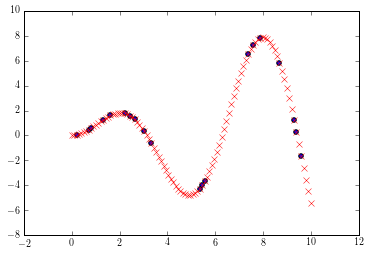

In [240]:
# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

plt.plot(x_plot, f(x_plot), 'rx')
plt.scatter(x, y, label="training points")
plt.show()

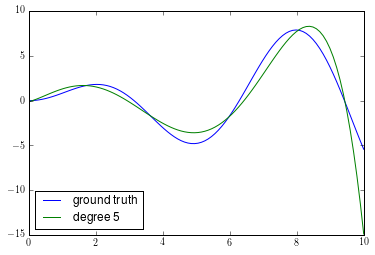

In [241]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
plt.plot(x_plot, f(x_plot), label="ground truth")

for degree in [5]:  # [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc='lower left')
plt.show()

## Cross validation

In order to avoid the impact of noise, we create several models and check the accuracy.

In fact, it measures how well a fitted model can generalize for unknown data.
Below there is an example extracted from sklearn page.

In [267]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

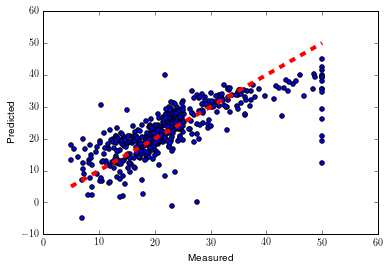

In [268]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()